# Exploration and Data Analysis of the sequence predicted

This notebook is dedicated to the analysis of the parameter of the sequences predicted with the tools available in this repository.

## Plotting the number of substitution events in 30 years

In [4]:
import pandas as pd
import os

directory = r'C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\mutation_prediction\output'

def counter(directory : str) -> pd.DataFrame:
    dico = {}
    for file in os.listdir(directory):
        if file.endswith('.csv') and file.startswith('1'):
            temp = pd.read_csv(os.path.join(directory, file))
            dico[int(file.split('_')[1].split('y')[0])] = temp[f"proba_seq_>=1_sub_{file.split('_')[1]}"].sum(axis=0)
    
    return pd.DataFrame(data = dict(sorted(dico.items())), index = [0])

counter(directory)

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,0.175821,0.350638,0.524455,0.697276,0.869107,1.03995,1.20981,1.378693,1.5466,1.713538,...,3.487021,3.642642,3.797345,3.951136,4.104017,4.255994,4.407071,4.55725,4.706536,4.854933


It appears the number of substitution found after 30 years is about 22, which is very close from the actual number we found in the MSA used to build this model (27 substitutions in 30 years). 

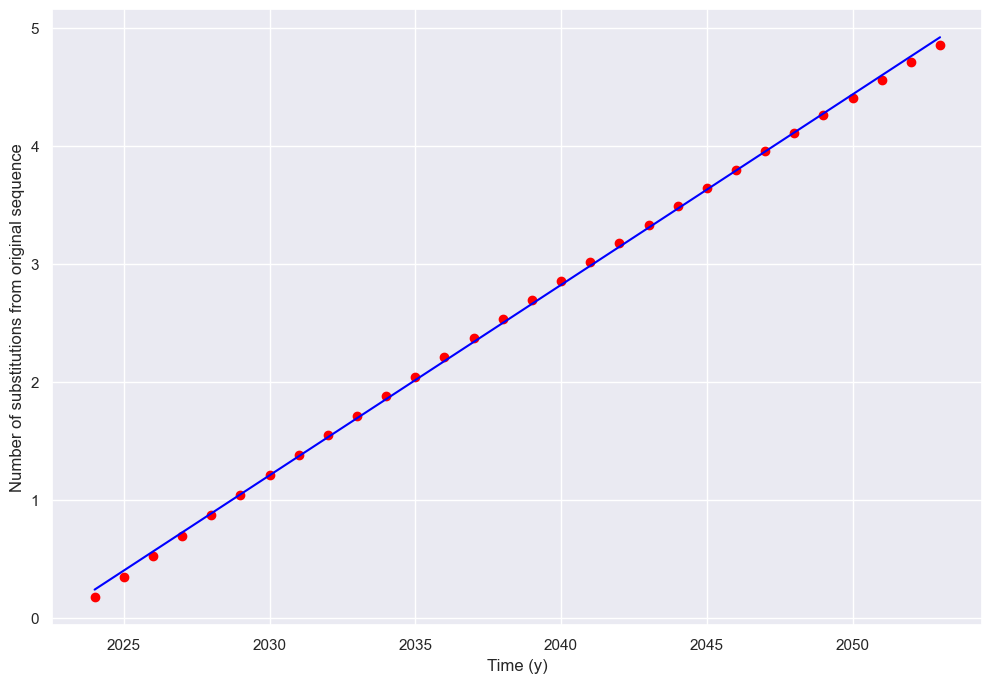

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set_theme(rc={'figure.figsize':(12,8)})

def display(df_proba : pd.DataFrame) -> None:
    plt.scatter([int(col)+2023 for col in df_proba.columns],[df_proba.iat[0, index] for index, col in enumerate(df_proba.columns)] , color='red')

    plt.xlabel("Time (y)")
    plt.ylabel("Number of substitutions from original sequence")

    X = [[int(col)+2023] for col in df_proba.columns]
    Y = [[df_proba.iat[0, index]] for index, col in enumerate(df_proba.columns)]

    LR = LinearRegression()
    LR.fit(X, Y)
    ypred = LR.predict(X)

    plt.plot([int(col)+2023 for col in df_proba.columns], ypred, color='blue')

display(df_proba)

In [3]:
df = pd.read_csv(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\mutation_prediction\output\1sub_10y_RNA_pol.csv", index_col="Unnamed: 0")

df.iloc[:, 7].sum() - df.iloc[61, 7]

1.6884886532834398

In [10]:
def init_frames(path :str) -> pd.DataFrame:
    all_df = []
    for file in os.listdir(path):
        if file.endswith('.csv') == True:
            df = pd.read_csv(os.path.join(path, file), index_col="Unnamed: 0")
            all_df.append(df)

        return df

df = init_frames(r"C:\Subpbiotech_cours\BT4\iGEM\Dry_lab\mutation_prediction\output")